# DS-SF-27 | Codealong 09 | Logistic Regression

In [2]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## `Iris` dataset, Take 2

In [3]:
df = pd.read_csv(os.path.join('..', 'datasets', 'iris.csv'))

In [4]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### Feature matrix and label vector

In [5]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]

In [6]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
c = df.Species

In [8]:
c

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

## Activity | Create a one-hot encoding/binary variables for the outcome variable

In [10]:
cs = pd.get_dummies(c, prefix = None)
# prefix - what I want before column name

## Activity | Run logistic regression to learn whether or not an iris plant is a `Setosa`

In [11]:
# TODO
model_Setosa = linear_model.LogisticRegression().fit(X, cs.Setosa)

In [12]:
model_Setosa.coef_
# this is B1, B2 ...

array([[ 0.41498833,  1.46129739, -2.26214118, -1.0290951 ]])

In [13]:
model_Setosa.intercept_
# this is our Bo

array([ 0.26560617])

> ## What's the accuracy of your model?

In [14]:
model_Setosa.score(X, cs.Setosa)

1.0

> ## Log odds plot (that each plant in the dataset is a `Setosa`)

In [16]:
logit_hat_Setosa = model_Setosa.intercept_ + \
    (X * model_Setosa.coef_[0]).sum(axis = 1)

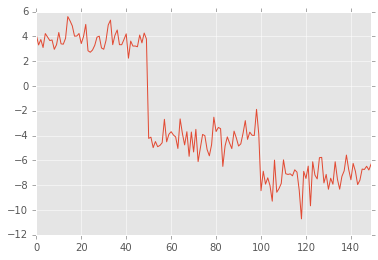

In [17]:
logit_hat_Setosa.plot()

> ## Using just the log odds, let's confirm the model accuracy

In [18]:
((logit_hat_Setosa >= 0) == (cs.Setosa == 1)).sum()

150

In [19]:
((logit_hat_Setosa >= 0) == (cs.Setosa == 1)).mean()

1.0

> ## Odds plot (that each plant in the dataset is a `Setosa`)

In [20]:
odds_hat_Setosa = np.exp(logit_hat_Setosa)

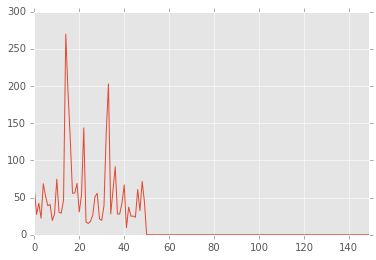

In [21]:
odds_hat_Setosa.plot()
# the odds of plant ~16 => Setosa is 270 : 1
# the odds of plant 60 => Setosa is 0 : 1


> ## Now, using just the odds, let's confirm the model accuracy

In [22]:
((odds_hat_Setosa >= 1) == (cs.Setosa == 1)).sum()

150

In [23]:
((odds_hat_Setosa >= 1) == (cs.Setosa == 1)).mean()

1.0

> ## Log class probabilities (that each plant in the dataset is a `Setosa`)

In [24]:
p_hat_Setosa = odds_hat_Setosa / (1 + odds_hat_Setosa)

In [25]:
p_hat_Setosa

0      0.984074
1      0.964775
2      0.976924
3      0.957121
4      0.985634
         ...   
145    0.001229
146    0.001190
147    0.001540
148    0.001140
149    0.001849
dtype: float64

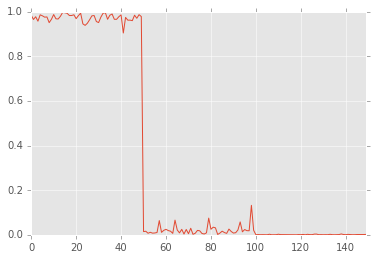

In [26]:
p_hat_Setosa.plot()

> ## Using the class probabilities, let's confirm for the last time the model accuracy

In [27]:
((p_hat_Setosa >= .5) == (cs.Setosa == 1)).sum()

150

In [28]:
((p_hat_Setosa >= .5) == (cs.Setosa == 1)).mean()

1.0

In [29]:
p_hat_Setosa

0      0.984074
1      0.964775
2      0.976924
3      0.957121
4      0.985634
         ...   
145    0.001229
146    0.001190
147    0.001540
148    0.001140
149    0.001849
dtype: float64

> ## Finally, let's compute the outcome class for the `Setosa` model and verify the model accuracy

In [30]:
c_hat_Setosa = p_hat_Setosa.round()